In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np
import seaborn as sns

In [4]:
las1 = lasio.read("Gorgonichthys_1_suite3_supercombo_log.las",engine='normal')
las2 = lasio.read("gorgonichthys_1_wire_public_2010_sdb.las",engine='normal')
well1 = las1.df().reset_index()
well2 = las2.df().reset_index()

In [5]:
up=3900
down=4200

In [6]:
print(las1.curves)

Mnemonic  Unit  Value  Description                               
--------  ----  -----  -----------                               
DEPTH     M            DEPTH (BOREHOLE)                          
AT10      OHMM         Array Induction Two Foot Resistivity A10  
AT20      OHMM         Array Induction Two Foot Resistivity A20  
AT30      OHMM         Array Induction Two Foot Resistivity A30  
AT60      OHMM         Array Induction Two Foot Resistivity A60  
AT90      OHMM         Array Induction Two Foot Resistivity A90  
CALI      IN           Caliper                                   
DRHO      G/C3         Bulk Density Correction                   
DT2       US/F         Delta-T Shear - Upper Dipole              
DTCO      US/F         Delta-T Compressional                     
DTSM      US/F         Delta-T Shear                             
GR        GAPI         Gamma Ray                                 
PEF                    Photoelectric Factor                      
PR        

In [7]:
print(las2.curves)

Mnemonic  Unit  Value  Description                                                            
--------  ----  -----  -----------                                                            
DEPTH     M                                                                                   
BS        IN           Values changed using TEXT_EDIT                                         
CALI      IN           Values changed using TEXT_EDIT                                         
DENS      G/C3         5       Bulk Density                                                   
DENSC     G/C3         12      Bulk Density Correction                                        
DRHO      G/C3         12      Bulk Density Correction                                        
DT        US/F         Curve clear from 3924.64 to 3930.54                                    
DTCO      US/F         Curve clear from 3924.64 to 3930.54                                    
DTSH      US/F         Curve clear from 3872.27 to

## Core Data

In [10]:
df_co = pd.read_excel("Core_data.xlsx")
df_co

,Well,Basin,Field,Top depth (m),Base depth (m),Porosity (%),Porosity method,Permeability (mD),Permeability method,Bulk density (g/cc),Core number,Grain density (g/cc),Nob pressure (Kpa),Sample Id,Analysis method,Remarks
0,Gorgonichthys 1,Browse,Ichthys,3963.13,NaN,4.3,AMBIENT,0.02,K INF,NaN,1,2,5515.84,2,RCA,NaN
1,Gorgonichthys 1,Browse,Ichthys,3963.13,NaN,4.3,AMBIENT,0.03,K AIR,NaN,1,2,5515.84,3,RCA,NaN
2,Gorgonichthys 1,Browse,Ichthys,3964.13,NaN,4.4,AMBIENT,0.85,K INF,NaN,1,2,5515.84,4,RCA,NaN
3,Gorgonichthys 1,Browse,Ichthys,3964.13,NaN,4.4,AMBIENT,0.97,K AIR,NaN,1,2,5515.84,5,RCA,NaN
4,Gorgonichthys 1,Browse,Ichthys,3964.43,NaN,4.7,AMBIENT,0.03,K INF,NaN,1,2,5515.84,6,RCA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Gorgonichthys 1,Browse,Ichthys,4559.40,NaN,12.0,AMBIENT,79.00,K AIR,NaN,11,2,5515.84,607,RCA,MSCT
606,Gorgonichthys 1,Browse,Ichthys,4612.99,NaN,6.2,AMBIENT,0.17,K INF,NaN,6,2,5515.84,608,RCA,MSCT
607,Gorgonichthys 1,Browse,Ichthys,4612.99,NaN,6.2,AMBIENT,0.26,K AIR,NaN,6,2,5515.84,609,RCA,MSCT
608,Gorgonichthys 1,Browse,Ichthys,4716.00,NaN,3.9,AMBIENT,0.00,K INF,NaN,2,2,5515.84,610,RCA,MSCT


In [11]:
d_c = np.array(df_co['Top depth (m)'][(df_co['Top depth (m)'] >= up) & (df_co['Top depth (m)'] <= down)])
#d_c = np.array(d_c[(d_c>=up)&(d_c<=down)])
phi_c = np.array(df_co['Porosity (%)'][(df_co['Top depth (m)'] >= up) & (df_co['Top depth (m)'] <= down)])
perm_c = np.array(df_co['Permeability (mD)'][(df_co['Top depth (m)'] >= up) & (df_co['Top depth (m)'] <= down)])
# phi_cd = np.array(phi_c)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]
# perm_cd = np.array(perm_cd)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]
phi_c = phi_c/100
d_c = d_c[::2]
phi_c = phi_c[::2]
perm_c = perm_c[::2]

## NAN value removal

In [ ]:

# Find the indices of NaN values in phi_c
nan_indices = np.isnan(phi_c)

# Print the indices of NaN values
for i in range(len(phi_c)):
    if nan_indices[i]:
        print(f"NaN value at index {i}")
        m = (phi_c[i-1]+phi_c[i+1])/2
        phi_c[i]=m

NaN value at index 66


In [12]:
nan_indices = np.isnan(perm_c)

# Print the indices of NaN values
for i in range(len(perm_c)):
    if nan_indices[i]:
        print(f"NaN value at index {i}")
        m = (perm_c[i-1]+perm_c[i+1])/2
        perm_c[i]=m

In [13]:
nan_indices = np.isnan(d_c)

# Print the indices of NaN values
for i in range(len(d_c)):
    if nan_indices[i]:
        print(f"NaN value at index {i}")
        m = (d_c[i-1]+dm_c[i+1])/2
        d_c[i]=m

## Combo Log Calculation Porosity using standard formula; Volume of shale

In [14]:
(well2.GR)[(well2.DEPTH>=up)&(well2.DEPTH<=down)].quantile([0.05,0.6,0.95])

0.05     25.29724
0.60    115.26518
0.95    176.99184
Name: GR, dtype: float64

In [15]:
cal = np.array(well2.CALI)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]
G = np.array(well2.GR[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
d = np.array(well2.DEPTH)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]
bit = np.array(well2.BS)[(well2.DEPTH>=up)&(well2.DEPTH<=down)]

R1 = np.array(well2.RESS[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
R5 = np.array(well2.RESD[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
RM = np.array(well2.RESM[(well2.DEPTH>=up)&(well2.DEPTH<=down)])

N = np.array(well2.TNPH[(well2.DEPTH>=up)&(well2.DEPTH<=down)])
Den = np.array(well2.RHOB[(well2.DEPTH>=up)&(well2.DEPTH<=down)])

#Volume of shale calculation 

Gmin = 25.29724
Gmax = 176.99184
I_gr = [((i - Gmin)/(Gmax-Gmin)) for i in G]
for i in range(len(I_gr)):
    if(I_gr[i]<0):
        I_gr[i] = 0
    if(I_gr[i]>1):
        I_gr[i]=1
N_c=np.zeros(len(N))
D_c=np.zeros(len(N))
N_sh=[]
D_sh=[]
rho_fl = 1.2
for i in range(len(G)):
    if (I_gr[i]<0.6):
        rho_ma = 2.65
    else:
        rho_ma=2.75
    phi_d = [((rho_ma - i)/(rho_ma - rho_fl)) for i in Den]
    
for i in range(len(G)):
    if (I_gr[i]>0.6):
        D_sh.append(phi_d[i])
        N_sh.append(N[i])
        
N_phi_sh = np.mean(N_sh)
D_phi_sh = np.mean(D_sh)
for i in range(len(G)):
    if (I_gr[i]>0.6):
        N_c[i] = N[i] + 0.04
        D_c[i] = phi_d[i]*0.8
    else:
        N_c[i] = N[i] + 0.04
        D_c[i] = phi_d[i]    
#total porosity
t_phi =[((((D_c[i]**2)+(N_c[i]**2))/2)**(0.5)) for i in range(len(G))]


In [16]:

def multi_combo_log1(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12,12), sharey=True)
    fig.suptitle("Multiple Log Display", fontsize=24)
    fig.subplots_adjust(top=0.8,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
        
        ax11 = ax[0].twiny()
        ax11.spines['top'].set_position(('outward',0))
        ax11.plot(cal, d, '-g', label= "Caliper")
        ax11.plot(bit, d, '-r', label= "Bit Size")
        ax11.set_xlabel('Caliper',color='g')    
        ax11.tick_params(axis='x', colors='g')
        ax11.grid(True)
        
        ax12 = ax[0].twiny()
        ax12.spines['top'].set_position(('outward',40))
        ax12.set_xlabel('Bit Size',color='r')    
        ax11.axvline(x=10.5,color='m')
        
        ax2 = ax[1].twiny()
        ax2.spines['top'].set_position(('outward',0))
        ax2.plot(G, d, '-b', label= "Gamma Ray",linewidth='0.5')
        
        #ax1.axhline(y=d[3775],color='m')
        ax2.axvline(x=25.29724,color='y')
        ax2.axvline(x=115.26518,color='orange')
       #plt.axvline(x=23.985337,color='k',linewidth='0.5')
        ax2.axvline(x=176.99184,color='y')
        ax2.set_xlabel('Gamma Count',color='b')    
        ax2.tick_params(axis='x', colors='b')
        ax2.grid(True)
        
        ax31 = ax[2].twiny()
#         ax31.set_xlim(1,1000)
        ax31.spines['top'].set_position(('outward',0))
        ax31.set_xscale('log')
        ax31.plot(R1, d, '-y', label= "Shallow")
        ax31.set_xlabel('Shallow Resistivity',color='y')    
        ax31.tick_params(axis='x', colors='y')
        ax31.grid(True)
        
        ax32 = ax[2].twiny()
#         ax32.set_xlim(1,1000)
        ax32.spines['top'].set_position(('outward',40))
        ax32.set_xscale('log')
        ax32.plot(R5, d, '-r', label= "Deep")
        ax32.set_xlabel('Deep Resistivity',color='r')    
        ax32.tick_params(axis='x', colors='r')
        ax32.grid(True)
        
        ax33 = ax[2].twiny()
#         ax33.set_xlim(1,1000)
        ax33.spines['top'].set_position(('outward',80))
        ax33.set_xscale('log')
        ax33.plot(RM, d, '-k', label= "Medium")
        ax33.set_xlabel('Medium Resistivity',color='k')    
        ax33.tick_params(axis='x', colors='k')
        ax33.grid(True)
        

        ax41 = ax[3].twiny()
        ax41.grid(True)
        ax41.set_xlim(0,0.6)
        ax41.invert_xaxis()
        ax41.spines['top'].set_position(('outward', 0))
        ax41.plot(N, d, '-c', label= "Neutron")
        #ax21.fill_betweenx(N_c,Den,color='yellow',alpha=.2,label='porosity')
        ax41.set_xlabel('Neutron Porosity', color= 'c')
        ax41.tick_params(axis='x', colors= 'c')
        
        ax42 = ax[3].twiny()
        ax42.set_xlim(1.65, 2.95)
        #ax22.invert_xaxis()
        ax42.spines['top'].set_position(('outward', 40))
        ax42.plot(Den, d, 'g', label = "Density")
        ax42.set_xlabel('Bulk Density', color = 'g')
        ax42.tick_params(axis= 'x', colors='g')
        
        
        ax51 = ax[4].twiny()
#       ax42.set_xlim(1.65, 2.95)
        #ax22.invert_xaxis()
        ax51.spines['top'].set_position(('outward', 0))
        ax51.plot(t_phi, d, 'orange', label = "Tphi")
#         ax51.plot((opt_phi_c),d_c, 'red', label = "phic",marker='.', linestyle='None')
        ax51.plot((phi_c),d_c, 'blue', label = "phic",marker='.', linestyle='None')
        ax51.set_xlabel('Total Porosity', color = 'orange')
        
        ax51.tick_params(axis= 'x', colors='orange')
        
#         ax52 = ax[4].twiny()
# #       ax42.set_xlim(1.65, 2.95)
#         #ax22.invert_xaxis()
#         ax52.spines['top'].set_position(('outward', 0))
#         ax52.plot(phi_c,d_c, 'pink', label = "phic")
#         ax52.set_xlabel('Core porosity', color = 'pink')
        
#         ax52.tick_params(axis= 'x', colors='pink')

        

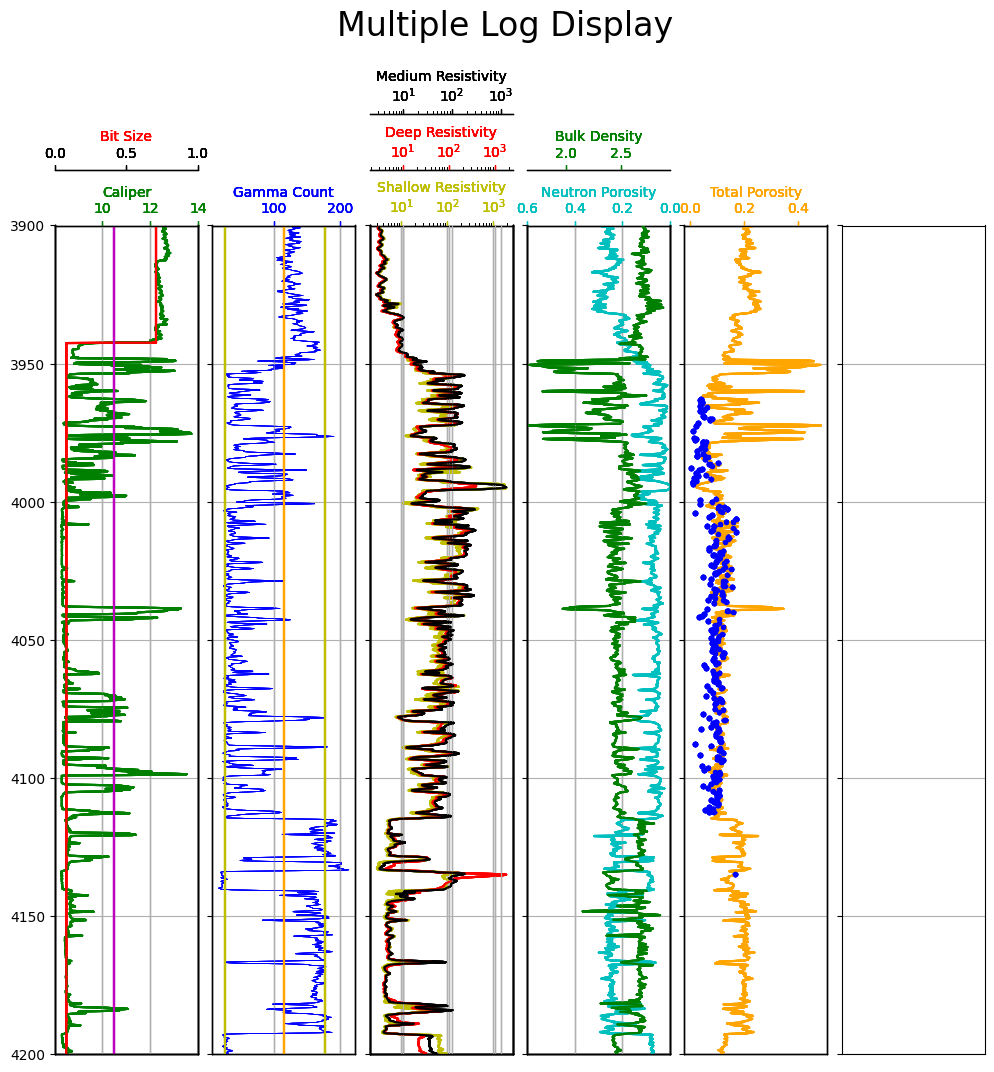

In [17]:
top = up
bottom = down
multi_combo_log1(top, bottom)

In [18]:
#N_c EXTRAPOLATION
from scipy.interpolate import interp1d
f = interp1d(d, N_c, fill_value='extrapolate')

ex_N_c = f(d_c)

print(ex_N_c)

[0.09668325 0.13630255 0.15419698 0.05425323 0.07054346 0.06043255
 0.09565486 0.07959709 0.12786601 0.06297724 0.09327441 0.08679685
 0.10733472 0.08500496 0.07924115 0.07531409 0.10091126 0.09506331
 0.09011583 0.12664596 0.09684961 0.08401375 0.12139105 0.12303764
 0.10912885 0.10057814 0.10962572 0.11664118 0.1108511  0.11467751
 0.11849307 0.12571585 0.14589633 0.1050926  0.11839079 0.08784105
 0.09613126 0.09258244 0.11387024 0.10432987 0.07615097 0.09718302
 0.08846433 0.08847945 0.08772428 0.0962385  0.09456008 0.09243373
 0.09887176 0.10103675 0.10631396 0.18267916 0.08623811 0.08760352
 0.15058073 0.10729079 0.11290638 0.16227425 0.1019126  0.09910588
 0.07977919 0.12578215 0.08388685 0.09007593 0.08194409 0.14325488
 0.06345722 0.08840173 0.09668325 0.15419698 0.0529948  0.07054346
 0.07476932 0.06313675 0.09565486 0.09864171 0.07471617 0.08972281
 0.12347381 0.10814129 0.09606165 0.12786601 0.12464659 0.07355021
 0.0610848  0.06772606 0.05174047 0.0644369  0.09081    0.0932

In [19]:
#D_c EXTRAPOLATION
from scipy.interpolate import interp1d
f = interp1d(d, D_c, fill_value='extrapolate')

ex_D_c = f(d_c)

print(ex_D_c)

[ 2.73965246e-01  3.26161463e-01  2.68157661e-01  8.75179654e-02
  2.73763236e-01  1.64748122e-01  2.00622319e-01  5.82588651e-01
  1.04118744e-01  7.82557698e-02  8.03763236e-02  9.74911757e-02
  4.63301656e-02  7.75194135e-02  6.13387637e-02  4.54021178e-02
  1.35570459e-01  1.57775183e-01  1.16650014e-01  9.24032944e-02
  2.32028781e-01  1.00006516e-01  1.64386460e-01  1.92660512e-01
  1.69766676e-01  1.29814463e-01  1.67210426e-01  1.31909675e-01
  1.58556611e-01  9.51284279e-02  1.83582406e-01  1.82352792e-01
  6.03909856e-03  1.67873654e-01  1.87721423e-01  1.60549914e-01
  1.47151054e-01  1.47004073e-01  1.17341298e-01  8.95271970e-02
  1.08234953e-01  1.40051226e-01  1.40633723e-01  1.25799620e-01
  1.33952756e-01  9.43269074e-02  1.42380125e-01  1.25139470e-01
  1.38702145e-01  1.12631912e-01  1.33512354e-01  1.26056657e-03
  1.29607023e-01  1.30444565e-01  4.42484207e-02  1.16390986e-01
  6.55063807e-02  6.96265001e-02  4.36024980e-02  1.46078559e-01
  1.22019549e-01  6.27388

Optimized Parameters: [0.2  0.04]
Optimized Values:  message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.000e-01  4.000e-02]
     nit: 1
     jac: [       nan        nan]
    nfev: 3
    njev: 1
1 0.04


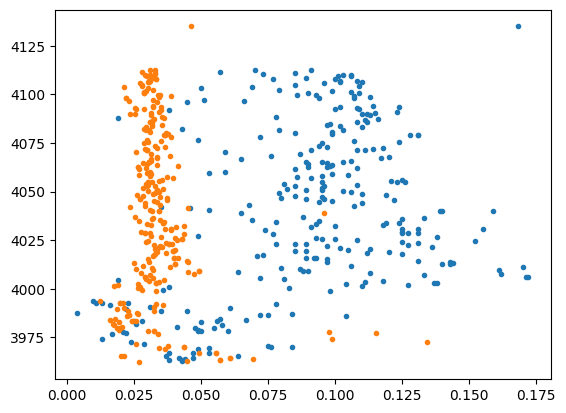

In [20]:
import numpy as np
from scipy.optimize import minimize

# Define your formula taking two inputs
def my_formula(x1, x2, a, b):
    return np.sqrt((((a**2) * x1**2) + ((b**2) * x2**2)/((a**2)+(b**2))))

# Define the fitness function
def fitness_function(params, x1_values, x2_values, target_values):
    a, b = params
    predicted_values = my_formula(x1_values, x2_values, a, b)
    difference = predicted_values - target_values
    return np.sum(difference**2)  # Use sum of squared differences as the fitness

# Your input lists converted to NumPy arrays
x1_values = ex_N_c
x2_values = ex_D_c
target_values = phi_c

# Initial guess for parameters
initial_params = [0.2,0.04]

constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},  # a > 0
               {'type': 'ineq', 'fun': lambda x: x[1]},)  # b > 0

# Minimize the fitness function with constraints
result = minimize(fitness_function, initial_params, args=(x1_values, x2_values, target_values),constraints=constraints)

# The optimized parameters
optimized_params = result.x
print("Optimized Parameters:", optimized_params)

# Apply the optimized formula to the input lists
opt_phi_c = my_formula(x1_values, x2_values, *optimized_params)
print("Optimized Values:",result)
""
plt.plot(phi_c,d_c,'.')
plt.plot(opt_phi_c,d_c,'.')
print('1',optimized_params[1])

In [21]:
dc1 = d_c.copy()
dd = np.zeros(len(d_c))
poc = np.zeros(len(d_c))
opt_po = np.zeros(len(d_c))
perm_oc = np.zeros(len(d_c))
p=0
mins=dc1[0]
for i in range(len(dc1)-1):
    mins = dc1[i]
    for j in range(i+1,len(dc1),1):
        if(dc1[j]<mins):
            a=dc1[j]
            dc1[j]=mins
            mins=a
            p=j
    dd[i]=mins
    poc[i]= phi_c[p]
    opt_po[i]= opt_phi_c[p]
    perm_oc[i] = perm_c[p]
print(dd)

#mean absolute error calculation

error = [np.abs(poc[i]-opt_po[i]) for i in range(len(dd))]
E=np.mean(error)

print('Error = ',E)

[3962.11 3962.83 3963.13 3963.13 3964.13 3964.43 3964.43 3965.5  3965.69
 3966.75 3966.75 3967.16 3969.2  3969.37 3970.18 3970.18 3970.45 3971.63
 3972.47 3974.29 3976.84 3977.33 3977.58 3978.35 3978.35 3978.44 3979.03
 3979.64 3979.94 3980.57 3981.14 3981.79 3982.72 3983.37 3983.37 3983.68
 3984.03 3984.71 3986.16 3986.5  3986.5  3987.13 3987.73 3988.37 3988.67
 3989.54 3990.23 3990.9  3991.49 3992.02 3992.65 3992.95 3992.95 3993.52
 3999.05 3999.63 4000.22 4000.96 4001.52 4001.84 4002.42 4002.81 4002.81
 4003.38 4003.95 4004.32 4004.86 4005.5  4006.2  4006.2  4007.29 4007.6
 4008.16 4008.77 4009.05 4009.05 4009.65 4010.29 4010.56 4011.17 4011.72
 4012.81 4012.81 4013.11 4013.71 4014.05 4014.57 4015.12 4015.67 4016.05
 4016.05 4016.72 4017.5  4017.8  4018.43 4019.03 4019.5  4019.5  4019.81
 4020.47 4021.06 4021.6  4021.81 4022.39 4022.94 4023.19 4023.19 4023.79
 4024.3  4024.62 4025.21 4025.81 4025.81 4026.19 4026.69 4027.28 4028.
 4028.8  4028.8  4028.85 4029.45 4030.04 4030.54 4030.

In [22]:
def multi(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(3,10), sharey=True)
    fig.suptitle("Porosity Log Display", fontsize=24)
    fig.subplots_adjust(top=0.8,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
        ax51 = ax[0].twiny()
        ax51.set_xlim(0, 0.2)
        #ax22.invert_xaxis()
        ax51.spines['top'].set_position(('outward', 0))
#         ax51.plot(t_phi, d, 'orange', label = "Tphi")
        ax51.plot(opt_po[:-1:],dd[:-1:], 'red', label = "phic", linestyle='None',marker='.')
        ax51.plot(poc[:-1:],dd[:-1:], 'blue', label = "phic",linestyle='-')
        ax51.set_xlabel('Optimised Porosity', color = 'red')
        ax51.tick_params(axis= 'x', colors='red')

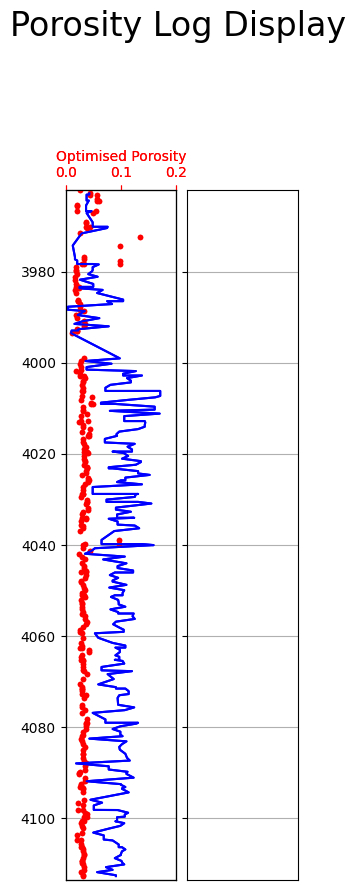

In [23]:
top1 = 3962.11
bottom1 = 4113.5
multi(top1,bottom1)


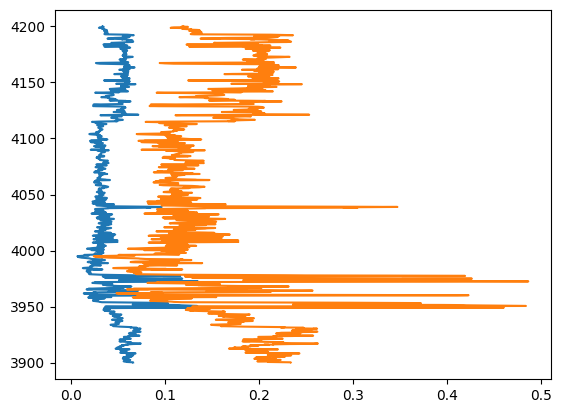

In [24]:
A = optimized_params[0]
B=optimized_params[1]

opt_t_phi = [np.sqrt((((A**2) * N_c[i]**2) + ((B**2) * D_c[i]**2)/((A**2)+(B**2)))) for i in range(len(d))]
plt.plot(opt_t_phi,d,t_phi,d)

In [25]:
def multi4(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4,15), sharey=True)
    fig.suptitle("Porosity Log Display", fontsize=24)
    fig.subplots_adjust(top=0.8,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
        ax1 = ax[0].twiny()
        #ax51.set_xlim(0, 0.2)
        #ax22.invert_xaxis()
        ax1.spines['top'].set_position(('outward', 0))
#         ax51.plot(t_phi, d, 'orange', label = "Tphi")
        ax1.plot(opt_t_phi,d, 'red', label = "phic", linestyle='None',marker='.')
        ax1.plot(t_phi,d, 'blue', label = "phic",linestyle='-')
        ax1.set_xlabel('Optimised Porosity Log', color = 'red')
        ax1.tick_params(axis= 'x', colors='red')

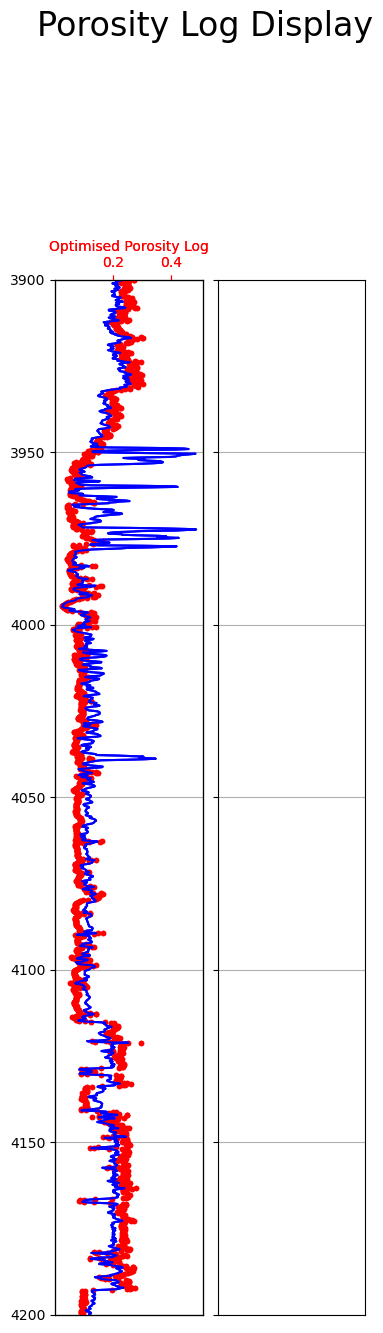

In [ ]:
top = up
bottom = down
multi4(top, bottom)

### Permeability - Porosity relation

In [26]:
rect_perm_oc = []
rect_por_oc = []
a = (perm_oc==0)
for i in range(len(a)):
    if(a[i]==False):
        rect_perm_oc.append(perm_oc[i])
        rect_por_oc.append(poc[i])
log_perm_c = np.log(rect_perm_oc)
por_c = rect_por_oc

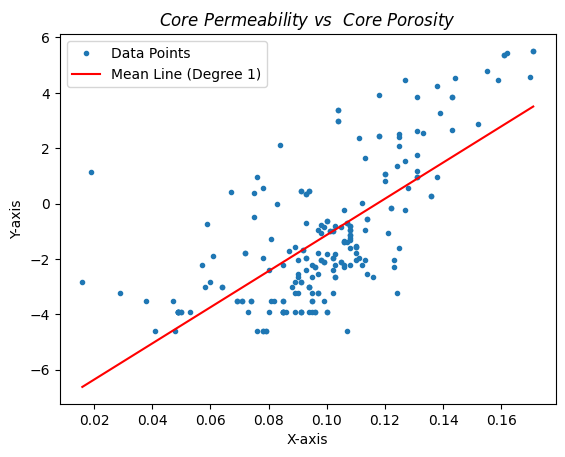

poly1d([65.32763107, -7.66506283])

In [27]:
x = por_c
y = log_perm_c

degree = 1
coefficients = np.polyfit(x, y, degree)

poly_function = np.poly1d(coefficients)

mean_line_x = np.linspace(min(x), max(x), 100)
mean_line_y = poly_function(mean_line_x)


plt.plot(x, y,'.', label='Data Points')

# Plot the polynomial fit
plt.plot(mean_line_x, mean_line_y, label=f'Mean Line (Degree {degree})', color='red')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title(r'$Core~Permeability~vs~~Core~Porosity$')
# Show the plot
plt.show()
poly_function

Text(0.014, 5.4, '$Log(Core~Permeability)~=~~65.33\\times Core~Porosity-7.67 $')

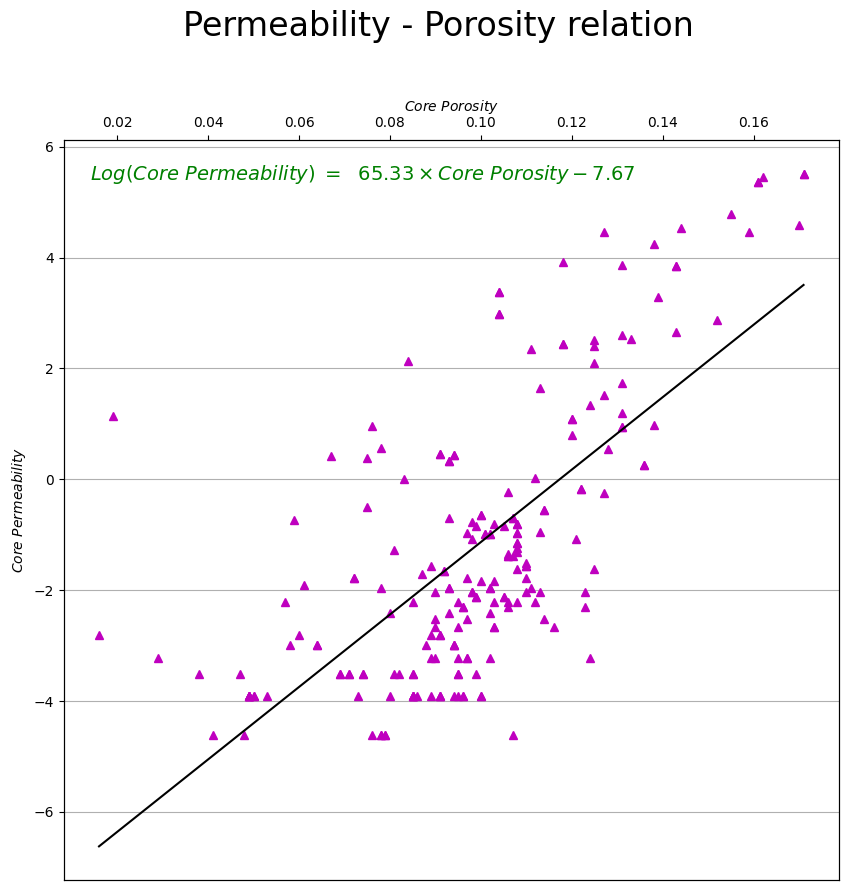

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), sharey=True)
fig.suptitle("Permeability - Porosity relation", fontsize=24)
fig.subplots_adjust(top=0.85,wspace=0.1)
#     axes.set_ylim (top_depth,bottom_depth)
ax.yaxis.grid(True)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r'$Core~Permeability$')
axp2 = ax.twiny()
#     axp2.set_xlim(1,1000)
axp2.spines['top'].set_position(('outward',0))
#     axp2.set_xscale('log')
axp2.plot(por_c,log_perm_c,  '^m', label= "Permeability")
axp2.set_xlabel(r'$Core~Porosity$')    
axp2.set_ylabel('Core Permeability')  
axp2.tick_params(axis='x', colors='k')

axp2.plot(mean_line_x,mean_line_y,  '-k', label= "Permeability")
axp2.text(0.014, 5.4, r'$Log(Core~Permeability)~=~~65.33\times Core~Porosity-7.67 $', fontsize=14, color='green')

In [ ]:
log_opt_perm = [((65.33*i)-7.67) for i in opt_t_phi]

### CMR Approach

In [ ]:
las3 = lasio.read("E:/IIT ISM BOOKS/3rd sem/Formation Evaluation/PROJECT/Gorgonichthys1_suite2_CMR_NUC_MAINLOG.las",engine='normal')
well3 = las3.df().reset_index()

In [ ]:
print(las3.curves)

Mnemonic  Unit  Value  Description                              
--------  ----  -----  -----------                              
DEPTH     M            DEPTH (BOREHOLE)                         
DRHO      G/C3         Bulk Density Correction                  
PEF                    Photoelectric Factor                     
RHOB      G/C3         Bulk Density                             
CALI      IN           Caliper                                  
TNPH      V/V          Thermal Neutron Porosity                 
NPHI      V/V          Thermal Neutron Porosity (Ratio Method)  
CNTC      HZ           Corrected Near Thermal Counting Rate     
CFTC      HZ           Corrected Far Thermal Counting Rate      
GR        GAPI         Gamma Ray                                
T2LM      MS           T2 Logarithmic Mean                      
CMRP_3MS  V/V          CMR 3ms Porosity                         
TCMR      V/V          Total CMR Porosity                       
KTIM      MD           Pe

In [ ]:
m=2
a=1
n=2
d3 = np.array(well3.DEPTH)[(well3.DEPTH>=up)&(well3.DEPTH<=down)]
Por = np.array(well3.TCMR)[(well3.DEPTH>=up)&(well3.DEPTH<=down)]
T2 = np.array(well3.T2LM[(well3.DEPTH>=up)&(well3.DEPTH<=down)])
log_cmr_perm = [((65.33*i)-7.67) for i in Por]

In [ ]:
def multi5(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,20), sharey=True)
    fig.suptitle("Permeability Log Display", fontsize=24)
    fig.subplots_adjust(top=0.8,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
        ax1 = ax[1].twiny()
        #ax51.set_xlim(0, 0.2)
        #ax22.invert_xaxis()
        ax1.spines['top'].set_position(('outward', 0))
#         ax51.plot(t_phi, d, 'orange', label = "Tphi")
        ax1.plot(log_opt_perm,d, 'red', label = "phic", linestyle='-')
        #ax1.plot(t_phi,d, 'blue', label = "phic",linestyle='-')
        ax1.set_xlabel('CMR log(Permeability)', color = 'black')
        ax1.plot(log_cmr_perm,d3, 'k', label = "phic", linestyle='None',marker='.')
        ax1.tick_params(axis= 'x', colors='red')
        
        ax2 = ax[0].twiny()
        ax2.set_xlim(-8, 40)
        #ax22.invert_xaxis()
        ax2.spines['top'].set_position(('outward', 0))
#         ax51.plot(t_phi, d, 'orange', label = "Tphi")
        ax2.plot(log_opt_perm,d, 'm', label = "phic", linestyle='-')
        #ax1.plot(t_phi,d, 'blue', label = "phic",linestyle='-')
        ax2.set_xlabel('Optimised log(Permeability)', color = 'red')
        ax2.tick_params(axis= 'x', colors='red')

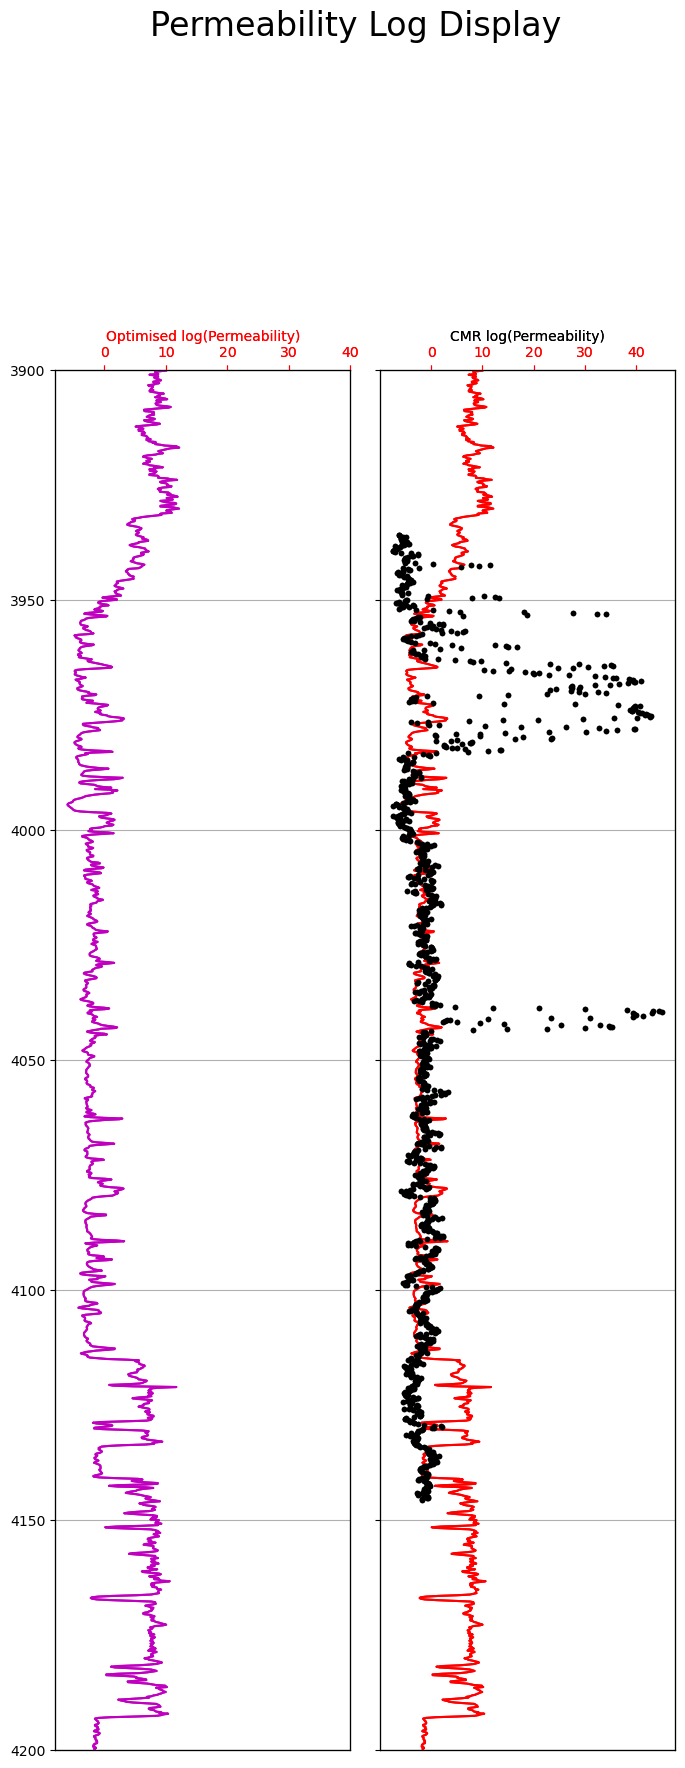

In [ ]:
top = up
bottom = down
multi5(top, bottom)

In [ ]:
def multi2(top_depth,bottom_depth):
    
    logs=well2
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4,12), sharey=True)
    fig.suptitle("CMR Log Display", fontsize=24)
    fig.subplots_adjust(top=0.9,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (3935,4145)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
        ax51 = ax[0].twiny()
        #ax51.set_xlim(0, 0.2)
        #ax22.invert_xaxis()
        ax51.spines['top'].set_position(('outward', 0))
#         ax51.plot(t_phi, d, 'orange', label = "Tphi")
        ax51.plot(Por,d3, '-r', label = "phic" )
        ax51.plot(poc[:-1:],dd[:-1:], 'b', label = "phic",linestyle='None',marker='.' )
#         ax51.plot(poc[:-1:],dd[:-1:], 'blue', label = "phic",linestyle='-')
        ax51.set_xlabel('CMR Porosity', color = 'red')
        ax51.tick_params(axis= 'x', colors='red')
        
#         ax6 = ax[1].twiny()
#         #ax51.set_xlim(0, 0.2)
#         #ax22.invert_xaxis()
#         ax6.spines['top'].set_position(('outward', 0))
# #         ax51.plot(t_phi, d, 'orange', label = "Tphi")
#         ax6.plot(np.log(Perm),d3, 'orange', label = "phic",linestyle='-' )
# #         ax51.plot(poc[:-1:],dd[:-1:], 'blue', label = "phic",linestyle='-')
#         ax6.set_xlabel('Log of CMR Permeability', color = 'orange')
#         ax6.tick_params(axis= 'x', colors='orange')

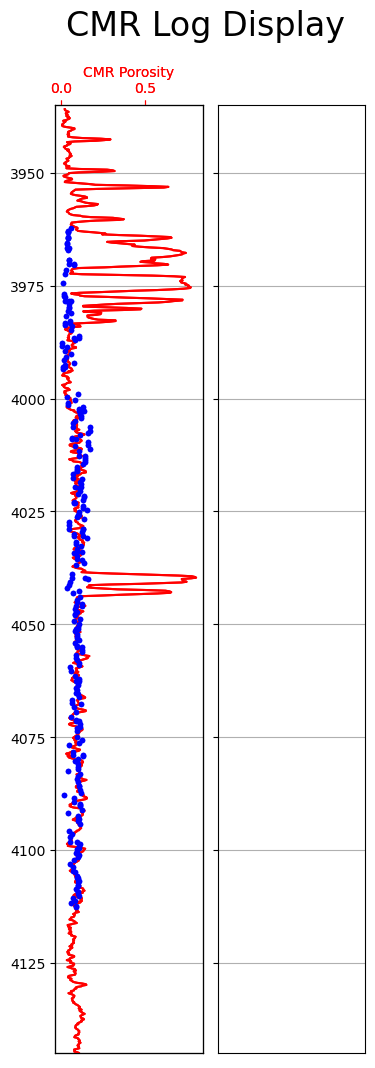

In [ ]:
multi2(up,down)